# Given Data of 303 patients contains their features like -
Age, Sex, Cp, Bps, Cholestrol etc
<h3><i><b>  Train a model for the task of heart disease prediction using Machine Learning. </h3></i></b>
<ul>
<li>Factors that influence heart disease are body cholesterol levels, smoking habit and obesity,<br>
family history of illnesses, blood pressure, and work environment. Machine learning algorithms<br>
play an essential and precise role in the prediction of heart disease.</li>

<li>Heart disease can be predicted based on various symptoms such as age, gender, heart rate, etc.<br>
and reduces the death rate of heart patients.<br></li>

<p>

</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2><b><i>Loading Dataset

In [2]:
df=pd.read_csv("Heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<i>No empty value

<h2><b><i>Correlation Matrix Representation-
HeatMap 

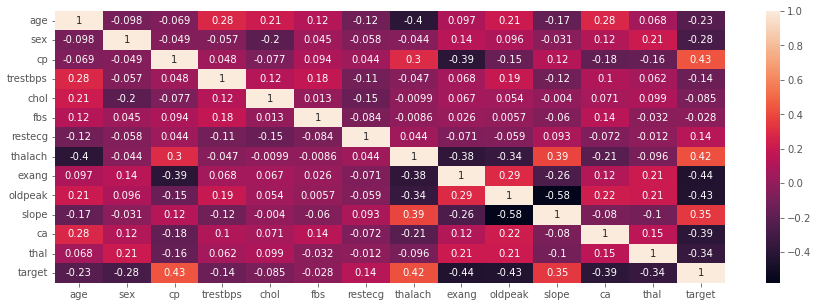

In [43]:
%matplotlib inline
fig=plt.figure(figsize=(15,5))

sns.heatmap(df.corr(),annot=True)
plt.show()

<i>Poor Correlation is seen in fbs, cholestrol & TrestBPS with "Target Variable"

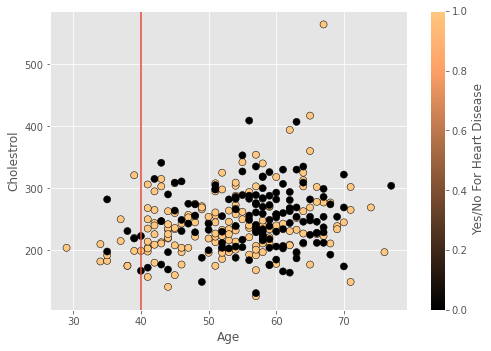

In [48]:
plt.figure(figsize=(8,5.5))
plt.style.use('ggplot')
plt.scatter(df["age"],df['chol'],c=df["target"],cmap='copper',edgecolors='black',s=50)
bar=plt.colorbar()
bar.set_label(" Yes/No For Heart Disease")
plt.axvline(40)
plt.xlabel("Age")
plt.ylabel('Cholestrol')
plt.show()

<i>It can be seen that most of the Heart Disease occur after 40 Yr of age

F:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


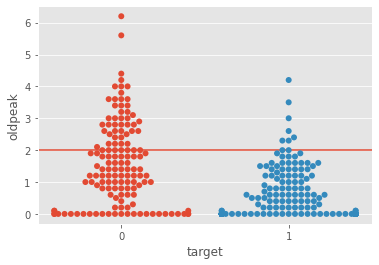

In [62]:
sns.swarmplot(x=df["target"],y=df["oldpeak"],s=6)
plt.axhline(2)
plt.show()

<i><b>It can be seen that People having Heart Disease are grouped around Lower value of "Old Peak" i.e value < 2

<h2><b><i>Data Preprocessing

In [4]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import cross_val_score,train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

<h4><b><i>Creating a Function to Calculate K-Fold for various Models

In [7]:
def k_fold(obj):
    ans=cross_val_score(estimator=obj,X=x_test,y=y_test,cv=10)
    print("K Means val Score = ",ans.mean()*100)
    print("K Means std = ",ans.std()*100)

<h2><b><i>1. Logistic Regression


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
log_classi=LogisticRegression(random_state=0)
log_classi.fit(x_train,y_train)
y_pred=log_classi.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy = ",accuracy_score(y_test,y_pred)*100)
k_fold(log_classi)


[[25  4]
 [ 5 27]]
Accuracy =  85.24590163934425
K Means val Score =  85.23809523809524
K Means std =  11.654512619543256


<h2><b><i>2. SVM

In [9]:
from sklearn.svm import SVC 
kernel_types=["sigmoid",'linear','poly','rbf']
for kernels in kernel_types:
    svm_classi=SVC(kernel=kernels,random_state=0)
    svm_classi.fit(x_train,y_train)
    y_pred=svm_classi.predict(x_test)
    print("\n",(" "+kernels.upper()+" ").center(16,'#'))
    print(confusion_matrix(y_test,y_pred))
    print("Accuracy = ",accuracy_score(y_test,y_pred)*100)
    k_fold(svm_classi)


 ### SIGMOID ####
[[25  4]
 [ 4 28]]
Accuracy =  86.88524590163934
K Means val Score =  86.9047619047619
K Means std =  12.428936320131609

 #### LINEAR ####
[[25  4]
 [ 4 28]]
Accuracy =  86.88524590163934
K Means val Score =  83.80952380952381
K Means std =  9.863007227241894

 ##### POLY #####
[[26  3]
 [ 3 29]]
Accuracy =  90.1639344262295
K Means val Score =  73.8095238095238
K Means std =  10.858813572372744

 ##### RBF ######
[[26  3]
 [ 5 27]]
Accuracy =  86.88524590163934
K Means val Score =  86.9047619047619
K Means std =  12.428936320131609


<i><b>SIGMOID/RBF have the highest K means = 86.9%

<h2><b><i>3. K Nearest Neighbor

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=13,metric='minkowski',p=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy = ",accuracy_score(y_test,y_pred)*100)
k_fold(knn)

[[25  4]
 [ 3 29]]
Accuracy =  88.52459016393442
K Means val Score =  86.9047619047619
K Means std =  9.945999321050202


<i><b>KNN has K fold val = 86.9% and standard Variation 9.9 % 

<h2><b><i>4. Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(x_train,y_train)
y_pred=NB.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy = ",accuracy_score(y_test,y_pred)*100)
k_fold(NB)


[[26  3]
 [ 5 27]]
Accuracy =  86.88524590163934
K Means val Score =  85.23809523809524
K Means std =  11.654512619543256


<h2><b><i>5. Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=42)
dt.fit(x_train,y_train)
dt.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy = ",accuracy_score(y_test,y_pred)*100)
k_fold(dt)

[[26  3]
 [ 5 27]]
Accuracy =  86.88524590163934
K Means val Score =  75.47619047619048
K Means std =  16.904761904761905


<h2><b><i>6. Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=70,criterion='entropy',random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy = ",accuracy_score(y_test,y_pred)*100)
k_fold(rf)

[[24  5]
 [ 4 28]]
Accuracy =  85.24590163934425
K Means val Score =  81.9047619047619
K Means std =  13.891382996014118


<i>Even Random Forest gave us only, 82% K fold value.
<h3>
<b><i>
Thus KNN Model with k=13 is the best fit with highest - K fold value as 86.9 and min std val as 9.9%
</b></i>
</h3>